# 第五周基础作业
问题描述
一、 数据说明： Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集） 根据现有的医疗信息预测5年内皮马印第安人糖尿病发作的概率。
数据链接：https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes
p.s.: Kaggle也有一个Practice Fusion Diabetes Classification任务，可以试试:)
https://www.kaggle.com/c/pf2012-diabetes
解题提示
1) 文件说明
pima-indians-diabetes.csv：数据文件

2) 字段说明
数据集共9个字段:
pregnants：怀孕次数
Plasma_glucose_concentration：口服葡萄糖耐量试验中2小时后的血浆葡萄糖浓度
blood_pressure：舒张压，单位:mm Hg
Triceps_skin_fold_thickness：三头肌皮褶厚度，单位：mm
serum_insulin：餐后血清胰岛素，单位:mm
BMI：体重指数（体重（公斤）/ 身高（米）^2）
Diabetes_pedigree_function：糖尿病家系作用
Age：年龄
Target：标签， 0表示不发病，1表示发病

作业格式要求：
juyter notebook格式，需包含：
1 代码
2 代码运行结果
3 对代码与结果的说明与理解

基础作业部分，可只提供代码运行结果（截图或log）和代码与结果，推荐markdown格式
批改标准
1. 对数据做数据探索分析（可参考0_EDA_ diabetes.ipynb，不计分）
2. 适当的特征工程（可参考1_FE_ diabetes.ipynb，不计分）
3. 采用5折交叉验证，分别用log似然损失和正确率，对Logistic回归模型的正则超参数调优。（各50分）

数据探索：

1. 导入工具

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''
%matplotlib inline是一个魔法函数（Magic Functions）。
官方给出的定义是：IPython有一组预先定义好的所谓的魔法函数（Magic Functions），你可以通过命令行的语法形式来访问它们。
由于 %matplotlib inline 的存在，当输入plt.plot(x,y_1)后，不必再输入 plt.show()，图像将自动显示出来
'''
%matplotlib inline

2. 读取数据

In [2]:
train = pd.read_csv("pima-indians-diabetes.csv")
train.head()

pregnants  Plasma_glucose_concentration  blood_pressure  \
0          6                           148              72   
1          1                            85              66   
2          8                           183              64   
3          1                            89              66   
4          0                           137              40   

   Triceps_skin_fold_thickness  serum_insulin   BMI  \
0                           35              0  33.6   
1                           29              0  26.6   
2                            0              0  23.3   
3                           23             94  28.1   
4                           35            168  43.1   

   Diabetes_pedigree_function  Age  Target  
0                       0.627   50       1  
1                       0.351   31       0  
2                       0.672   32       1  
3                       0.167   21       0  
4                       2.288   33       1

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnants                       768 non-null int64
Plasma_glucose_concentration    768 non-null int64
blood_pressure                  768 non-null int64
Triceps_skin_fold_thickness     768 non-null int64
serum_insulin                   768 non-null int64
BMI                             768 non-null float64
Diabetes_pedigree_function      768 non-null float64
Age                             768 non-null int64
Target                          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
train.describe()

pregnants  Plasma_glucose_concentration  blood_pressure  \
count  768.000000                    768.000000      768.000000   
mean     3.845052                    120.894531       69.105469   
std      3.369578                     31.972618       19.355807   
min      0.000000                      0.000000        0.000000   
25%      1.000000                     99.000000       62.000000   
50%      3.000000                    117.000000       72.000000   
75%      6.000000                    140.250000       80.000000   
max     17.000000                    199.000000      122.000000   

       Triceps_skin_fold_thickness  serum_insulin         BMI  \
count                   768.000000     768.000000  768.000000   
mean                     20.536458      79.799479   31.992578   
std                      15.952218     115.244002    7.884160   
min                       0.000000       0.000000    0.000000   
25%                       0.000000       0.000000   27.300000   
50%                      23.000000      30.500000   32.000000   
75%                      32.000000     127.250000   36.600000   
max                      99.000000     846.000000   67.100000   

       Diabetes_pedigree_function         Age      Target  
count                  768.000000  768.000000  768.000000  
mean                     0.471876   33.240885    0.348958  
std                      0.331329   11.760232    0.476951  
min                      0.078000   21.000000    0.000000  
25%                      0.243750   24.000000    0.000000  
50%                      0.372500   29.000000    0.000000  
75%                      0.626250   41.000000    1.000000  
max                      2.420000   81.000000    1.000000

通过上面的基本统计信息可以看出，有5个特征的最小值（min）是0，而这些特征在常识中是不应该为0的，再加上查看训练数据info信息时发现每列特征均是non-null的，所以猜测0是为了补空（填充缺失值），实际没有意义。
可以对这部分0的数据进行替换，替换为NaN值或者替换为均值。

In [12]:
NaN_col_names = ['Plasma_glucose_concentration','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','BMI']
train[NaN_col_names] = train[NaN_col_names].replace(0,np.NaN)
#打印其缺失值的数量
print(train.isnull().sum())

pregnants                         0
Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
Diabetes_pedigree_function        0
Age                               0
Target                            0
dtype: int64


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnants                       768 non-null int64
Plasma_glucose_concentration    763 non-null float64
blood_pressure                  733 non-null float64
Triceps_skin_fold_thickness     541 non-null float64
serum_insulin                   394 non-null float64
BMI                             757 non-null float64
Diabetes_pedigree_function      768 non-null float64
Age                             768 non-null int64
Target                          768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [9]:
train.describe()

pregnants  Plasma_glucose_concentration  blood_pressure  \
count  768.000000                    763.000000      733.000000   
mean     3.845052                    121.686763       72.405184   
std      3.369578                     30.535641       12.382158   
min      0.000000                     44.000000       24.000000   
25%      1.000000                     99.000000       64.000000   
50%      3.000000                    117.000000       72.000000   
75%      6.000000                    141.000000       80.000000   
max     17.000000                    199.000000      122.000000   

       Triceps_skin_fold_thickness  serum_insulin         BMI  \
count                   541.000000     394.000000  757.000000   
mean                     29.153420     155.548223   32.457464   
std                      10.476982     118.775855    6.924988   
min                       7.000000      14.000000   18.200000   
25%                      22.000000      76.250000   27.500000   
50%                      29.000000     125.000000   32.300000   
75%                      36.000000     190.000000   36.600000   
max                      99.000000     846.000000   67.100000   

       Diabetes_pedigree_function         Age      Target  
count                  768.000000  768.000000  768.000000  
mean                     0.471876   33.240885    0.348958  
std                      0.331329   11.760232    0.476951  
min                      0.078000   21.000000    0.000000  
25%                      0.243750   24.000000    0.000000  
50%                      0.372500   29.000000    0.000000  
75%                      0.626250   41.000000    1.000000  
max                      2.420000   81.000000    1.000000

除了替换为nan之外，也可以填充均值，对于缺失值比较多的，可以新增特征字段，使用0/1描述特征是缺失的还是不缺失的

3. 查看每个变量的分布及其与标签之间的关系

对于缺失比较多的列Triceps_skin_fold_thickness、serum_insulin，新增一个特征，表示这个特征是否缺失

In [15]:
train['Triceps_skin_fold_thickness_Missing'] = train['Triceps_skin_fold_thickness'].apply(lambda x: 1 if pd.isnull(x) else 0)
train[['Triceps_skin_fold_thickness','Triceps_skin_fold_thickness_Missing']].head(10)

Triceps_skin_fold_thickness  Triceps_skin_fold_thickness_Missing
0                         35.0                                    0
1                         29.0                                    0
2                          NaN                                    1
3                         23.0                                    0
4                         35.0                                    0
5                          NaN                                    1
6                         32.0                                    0
7                          NaN                                    1
8                         45.0                                    0
9                          NaN                                    1

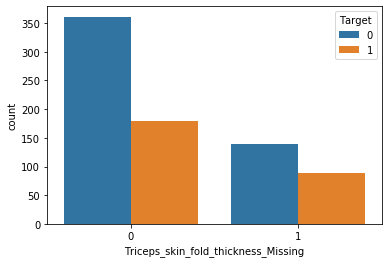

In [16]:
sns.countplot(x="Triceps_skin_fold_thickness_Missing", hue="Target",data=train)

In [19]:
train['serum_insulin_missing'] = train['serum_insulin'].apply(lambda x:1 if pd.isnull(x) else 0)
train[['serum_insulin','serum_insulin_missing']].head(10)

serum_insulin  serum_insulin_missing
0            NaN                      1
1            NaN                      1
2            NaN                      1
3           94.0                      0
4          168.0                      0
5            NaN                      1
6           88.0                      0
7            NaN                      1
8          543.0                      0
9            NaN                      1

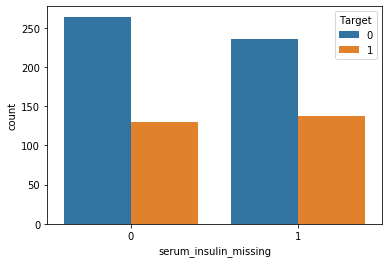

In [20]:
sns.countplot(x='serum_insulin_missing',hue='Target',data=train)

从新增两列的直方图可以看出，特征是否缺失和目标y关系不大，可以将新增的特征删除，用中值填补。

In [24]:
train.drop(["Triceps_skin_fold_thickness_Missing", "serum_insulin_missing"], axis=1, inplace=True)

In [25]:
#使用中值填充
medians = train.median()
train = train.fillna(medians)

print(train.isnull().sum())

pregnants                       0
Plasma_glucose_concentration    0
blood_pressure                  0
Triceps_skin_fold_thickness     0
serum_insulin                   0
BMI                             0
Diabetes_pedigree_function      0
Age                             0
Target                          0
dtype: int64


查看所有元素直方图、琴型图、分组图

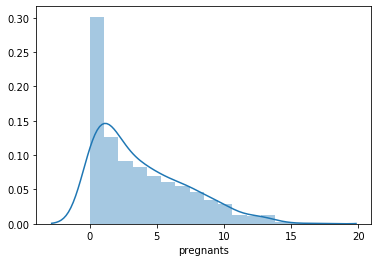

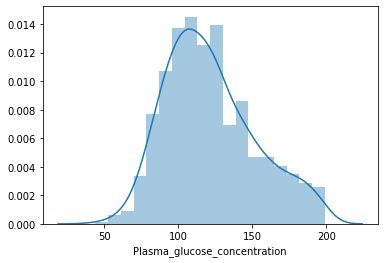

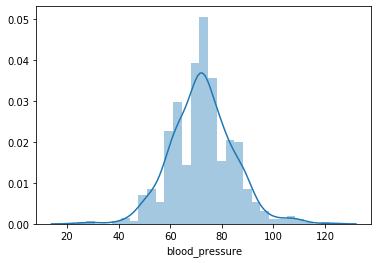

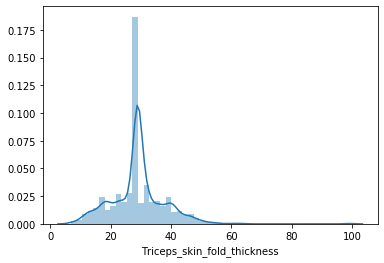

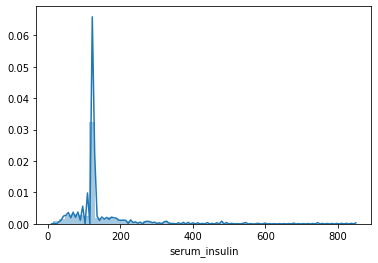

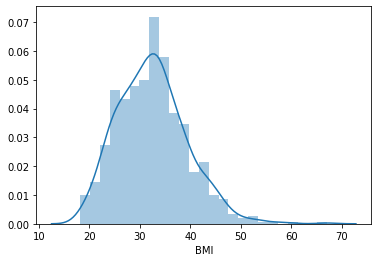

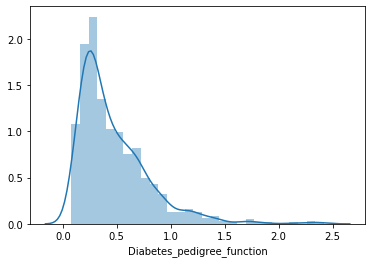

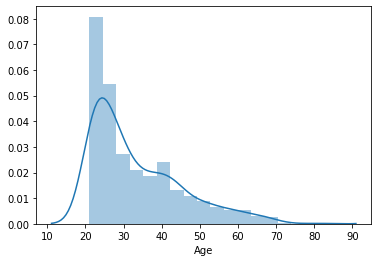

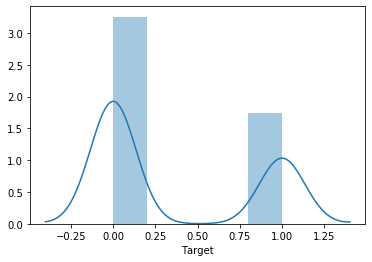

In [26]:
#查看直方图
for feature in train.columns:
    sns.distplot(train[feature],kde='False')
    plt.show()

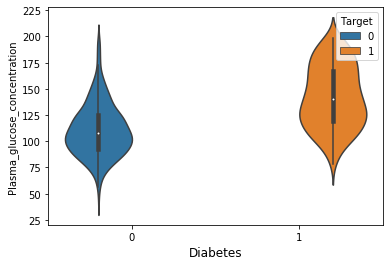

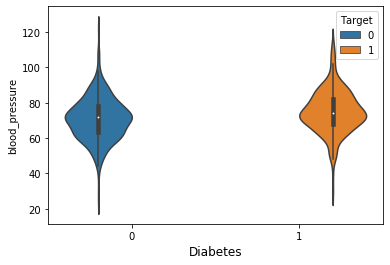

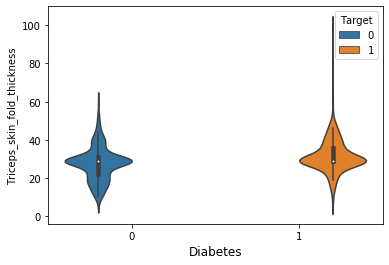

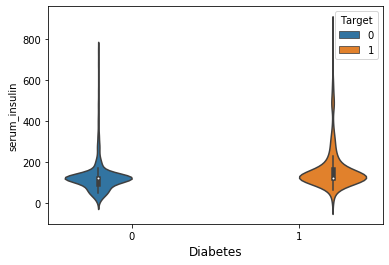

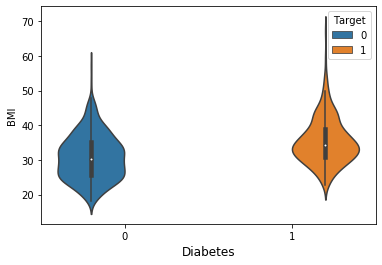

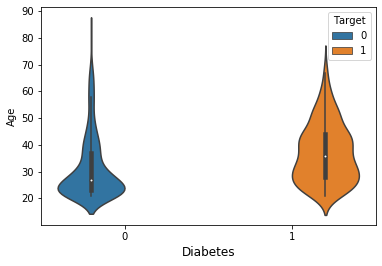

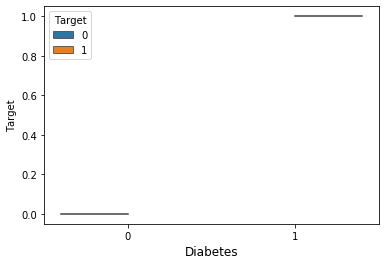

In [38]:
#查看琴型图
for feature in train.columns:
    sns.violinplot(x='Target',y=train[feature],data=train, hue="Target")
    plt.xlabel('Diabetes', fontsize=12)
    #print(type(train[feature]))
    #plt.ylabel(train[feature], fontsize=12)
    plt.show()